# Install dan Import Library yang dibutuhkan

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import pickle
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Collecting Dataset 

Rekam Data isyarat untuk satu tangan

In [96]:
DATA_DIR = './data1tangan'
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

label = {
    0: 'C',
    1: 'E',
    2: 'I',
    3: 'J',
    4: 'L',
    5: 'O',
    6: 'R',
    7: 'U',
    8: 'V',
    9: 'Z'
}
number_of_classes = len(label)
dataset_size = 100

cap = cv2.VideoCapture(0)

for j in range(number_of_classes):
    if not os.path.exists(os.path.join(DATA_DIR, str(j))):
        os.makedirs(os.path.join(DATA_DIR, str(j)))

    print('Collecting data untuk class {}'.format(label[j]))

    done = False
    while True:
        ret, frame = cap.read()
        cv2.putText(frame, 'Tekan "Q" untuk merekam huruf {}'.format(label[j]), (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3, cv2.LINE_AA)
        cv2.imshow('frame', frame)

        # Wait for key press
        key = cv2.waitKey(1)

        # Check if 'Q' key is pressed to record the letter
        if key == ord('q') or key == ord('Q'):
            break

        # Check if 'X' key is pressed to exit the program
        if key == ord('x') or key == ord('X'):
            done = True
            break

    if done:
        break

    counter = 0
    while counter < dataset_size:
        ret, frame = cap.read()
        cv2.imshow('frame', frame)
        cv2.waitKey(25)

        # Check if 'X' key is pressed to exit the program
        if cv2.waitKey(1) == ord('x') or key == ord('X'):
            done = True
            break

        cv2.imwrite(os.path.join(DATA_DIR, str(j), '{}.jpg'.format(counter)), frame)
        counter += 1

    if done:
        break

cap.release()
cv2.destroyAllWindows()


Rekam Data isyarat untuk dua tangan

In [40]:
DATA_DIR = './data2tangan'
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

label = { 
    0: 'Y',
    1: 'y'
}

number_of_classes = len(label)
dataset_size = 100

cap = cv2.VideoCapture(0)

for j in range(number_of_classes):
    if not os.path.exists(os.path.join(DATA_DIR, str(j))):
        os.makedirs(os.path.join(DATA_DIR, str(j)))

    print('Collecting data untuk class {}'.format(label[j]))

    done = False
    while True:
        ret, frame = cap.read()
        cv2.putText(frame, 'Tekan "Q" untuk merekam huruf {}'.format(label[j]), (60, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3, cv2.LINE_AA)
        cv2.imshow('frame', frame)

        # Wait for key press
        key = cv2.waitKey(1)

        # Check if 'Q' key is pressed to record the letter
        if key == ord('q') or key == ord('Q'):
            break

        # Check if 'X' key is pressed to exit the program
        if key == ord('x') or key == ord('X'):
            done = True
            break

    if done:
        break

    counter = 0
    while counter < dataset_size:
        ret, frame = cap.read()
        cv2.imshow('frame', frame)
        cv2.waitKey(25)

        # Check if 'X' key is pressed to exit the program
        if cv2.waitKey(1) == ord('x') or key == ord('X'):
            done = True
            break

        cv2.imwrite(os.path.join(DATA_DIR, str(j), '{}.jpg'.format(counter)), frame)
        counter += 1

    if done:
        break

cap.release()
cv2.destroyAllWindows()


# Exploratory Data Analytics

In [42]:
# Cek folder index
DATA_DIR1 = './data1tangan'
print("Folders pada data satu tangan :", os.listdir(DATA_DIR1))
folder_count1 = len(os.listdir(DATA_DIR1))
print("Jumlah Folders pada data satu tangan :", folder_count1)
print("-" * 127)

DATA_DIR2 = './data2tangan'
print("Folders pada data dua tangan :", os.listdir(DATA_DIR2))
folder_count2 = len(os.listdir(DATA_DIR2))
print("Jumlah Folders pada data dua tangan :", folder_count2)
print("-" * 127)

total_folder_count = folder_count1 + folder_count2
print("Jumlah Total Folder:", total_folder_count)

Folders pada data satu tangan : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Jumlah Folders pada data satu tangan : 10
-------------------------------------------------------------------------------------------------------------------------------
Folders pada data dua tangan : ['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9']
Jumlah Folders pada data dua tangan : 16
-------------------------------------------------------------------------------------------------------------------------------
Jumlah Total Folder: 26


In [43]:
# cek jumlah data yang dimiliki masing-masing huruf
dir_a = os.path.join(DATA_DIR2, "0")
print("Jumlah data untuk huruf A:", len(os.listdir(dir_a)))
dir_b = os.path.join(DATA_DIR2, "1")
print("Jumlah data untuk huruf B:", len(os.listdir(dir_b)))
dir_c = os.path.join(DATA_DIR1, "0")
print("Jumlah data untuk huruf C:", len(os.listdir(dir_c)))
dir_d = os.path.join(DATA_DIR2, "2")
print("Jumlah data untuk huruf D:", len(os.listdir(dir_d)))
dir_e = os.path.join(DATA_DIR1, "1")
print("Jumlah data untuk huruf E:", len(os.listdir(dir_e)))
dir_f = os.path.join(DATA_DIR2, "3")
print("Jumlah data untuk huruf F:", len(os.listdir(dir_f)))
dir_g = os.path.join(DATA_DIR2, "4")
print("Jumlah data untuk huruf G:", len(os.listdir(dir_g)))
dir_h = os.path.join(DATA_DIR2, "5")
print("Jumlah data untuk huruf H:", len(os.listdir(dir_h)))
dir_i = os.path.join(DATA_DIR1, "2")
print("Jumlah data untuk huruf I:", len(os.listdir(dir_i)))
dir_j = os.path.join(DATA_DIR1, "3")
print("Jumlah data untuk huruf J:", len(os.listdir(dir_j)))
dir_k = os.path.join(DATA_DIR2, "6")
print("Jumlah data untuk huruf K:", len(os.listdir(dir_k)))
dir_l = os.path.join(DATA_DIR1, "4")
print("Jumlah data untuk huruf L:", len(os.listdir(dir_l)))
dir_m = os.path.join(DATA_DIR2, "7")
print("Jumlah data untuk huruf M:", len(os.listdir(dir_m)))
dir_n = os.path.join(DATA_DIR2, "8")
print("Jumlah data untuk huruf N:", len(os.listdir(dir_n)))
dir_o = os.path.join(DATA_DIR1, "5")
print("Jumlah data untuk huruf O:", len(os.listdir(dir_o)))
dir_p = os.path.join(DATA_DIR2, "9")
print("Jumlah data untuk huruf P:", len(os.listdir(dir_p)))
dir_q = os.path.join(DATA_DIR2, "10")
print("Jumlah data untuk huruf Q:", len(os.listdir(dir_q)))
dir_r = os.path.join(DATA_DIR1, "6")
print("Jumlah data untuk huruf R:", len(os.listdir(dir_r)))
dir_s = os.path.join(DATA_DIR2, "11")
print("Jumlah data untuk huruf S:", len(os.listdir(dir_s)))
dir_t = os.path.join(DATA_DIR2, "12")
print("Jumlah data untuk huruf T:", len(os.listdir(dir_t)))
dir_u = os.path.join(DATA_DIR1, "7")
print("Jumlah data untuk huruf U:", len(os.listdir(dir_u)))
dir_v = os.path.join(DATA_DIR1, "8")
print("Jumlah data untuk huruf V:", len(os.listdir(dir_v)))
dir_w = os.path.join(DATA_DIR2, "13")
print("Jumlah data untuk huruf W:", len(os.listdir(dir_w)))
dir_x = os.path.join(DATA_DIR2, "14")
print("Jumlah data untuk huruf X:", len(os.listdir(dir_x)))
dir_y = os.path.join(DATA_DIR2, "15")
print("Jumlah data untuk huruf Y:", len(os.listdir(dir_y)))
dir_z = os.path.join(DATA_DIR1, "9")
print("Jumlah data untuk huruf Z:", len(os.listdir(dir_z)))
print("-" * 127)
print("Jumlah Total data:", len(os.listdir(dir_a)) + len(os.listdir(dir_b)) + len(os.listdir(dir_c)) + len(os.listdir(dir_d))
     + len(os.listdir(dir_e)) + len(os.listdir(dir_f)) + len(os.listdir(dir_g)) + len(os.listdir(dir_h)) + len(os.listdir(dir_i))
     + len(os.listdir(dir_j)) + len(os.listdir(dir_k)) + len(os.listdir(dir_l)) + len(os.listdir(dir_m)) + len(os.listdir(dir_n))
     + len(os.listdir(dir_o)) + len(os.listdir(dir_p)) + len(os.listdir(dir_q)) + len(os.listdir(dir_r)) + len(os.listdir(dir_s))
     + len(os.listdir(dir_t)) + len(os.listdir(dir_u)) + len(os.listdir(dir_v)) + len(os.listdir(dir_w)) + len(os.listdir(dir_x))
     + len(os.listdir(dir_y)) + len(os.listdir(dir_z)))

Jumlah data untuk huruf A: 200
Jumlah data untuk huruf B: 200
Jumlah data untuk huruf C: 200
Jumlah data untuk huruf D: 200
Jumlah data untuk huruf E: 200
Jumlah data untuk huruf F: 200
Jumlah data untuk huruf G: 200
Jumlah data untuk huruf H: 200
Jumlah data untuk huruf I: 200
Jumlah data untuk huruf J: 200
Jumlah data untuk huruf K: 200
Jumlah data untuk huruf L: 200
Jumlah data untuk huruf M: 200
Jumlah data untuk huruf N: 200
Jumlah data untuk huruf O: 200
Jumlah data untuk huruf P: 200
Jumlah data untuk huruf Q: 200
Jumlah data untuk huruf R: 200
Jumlah data untuk huruf S: 200
Jumlah data untuk huruf T: 200
Jumlah data untuk huruf U: 200
Jumlah data untuk huruf V: 200
Jumlah data untuk huruf W: 200
Jumlah data untuk huruf X: 200
Jumlah data untuk huruf Y: 200
Jumlah data untuk huruf Z: 200
-------------------------------------------------------------------------------------------------------------------------------
Jumlah Total data: 5200


# Data Visualization

Gambar Data Isyarat Satu Tangan

Gambar untuk data satu tangan
Menampilkan gambar untuk kelas C


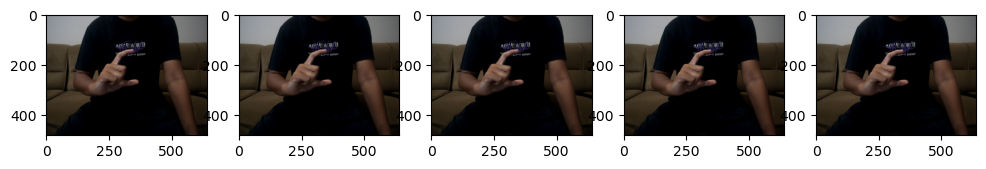

Menampilkan gambar untuk kelas E


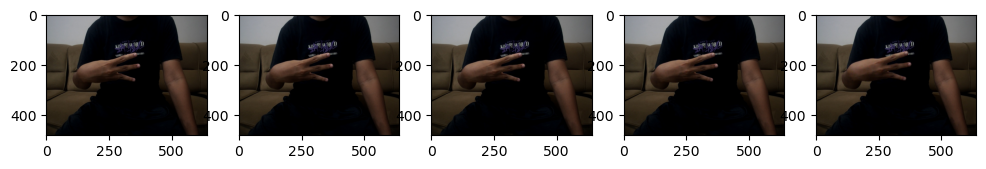

Menampilkan gambar untuk kelas I


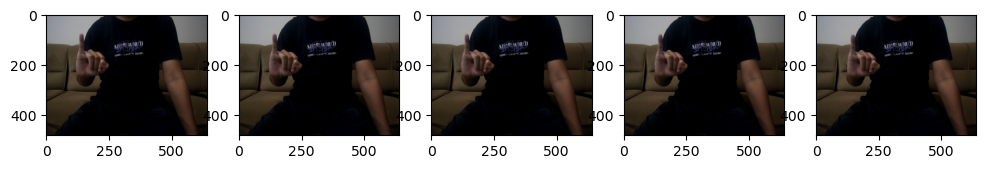

Menampilkan gambar untuk kelas J


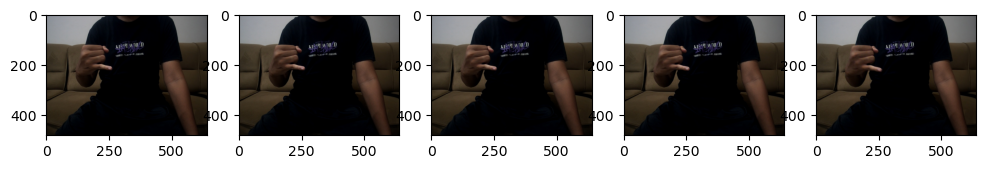

Menampilkan gambar untuk kelas L


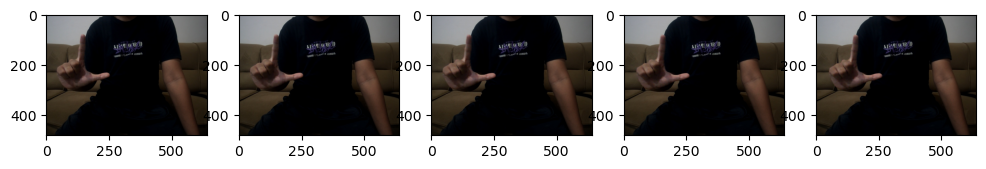

Menampilkan gambar untuk kelas O


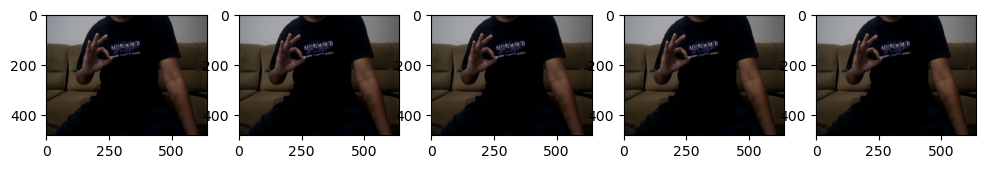

Menampilkan gambar untuk kelas R


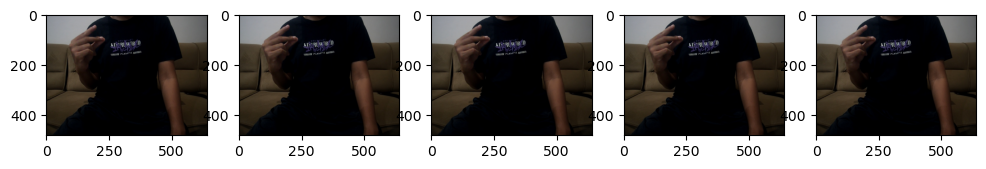

Menampilkan gambar untuk kelas U


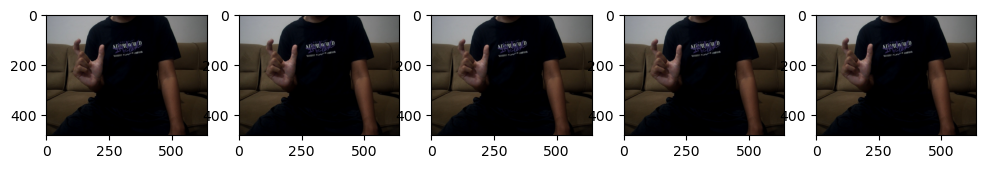

Menampilkan gambar untuk kelas V


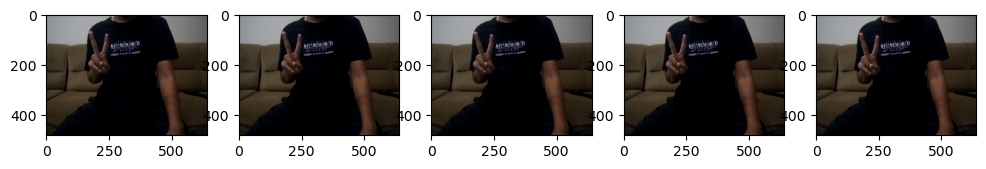

Menampilkan gambar untuk kelas Z


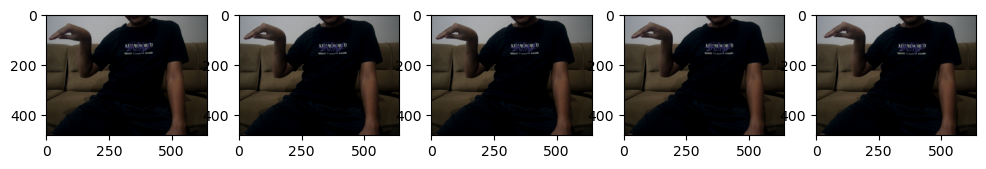

In [44]:
label = {
    0: 'C',
    1: 'E',
    2: 'I',
    3: 'J',
    4: 'L',
    5: 'O',
    6: 'R',
    7: 'U',
    8: 'V',
    9: 'Z'
}
print('Gambar untuk data satu tangan')
number_of_classes = len(label)
for j in range(number_of_classes):
    print('Menampilkan gambar untuk kelas', label[j])

    # Create a subplot for each image, limit to 5 images
    fig, axs = plt.subplots(1, 5, figsize=(12, 3))

    for i in range(5):
        # Read the saved image
        img_path = os.path.join(DATA_DIR1, str(j), '{}.jpg'.format(i))
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

        # Display the image on the corresponding subplot
        axs[i].imshow(img_rgb)
        axs[i].axis('on')

    plt.show()

Gambar Data Isyarat dua tangan

Gambar untuk data dua tangan
Menampilkan gambar untuk kelas A


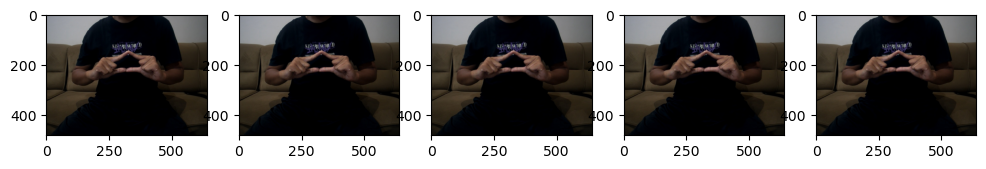

Menampilkan gambar untuk kelas B


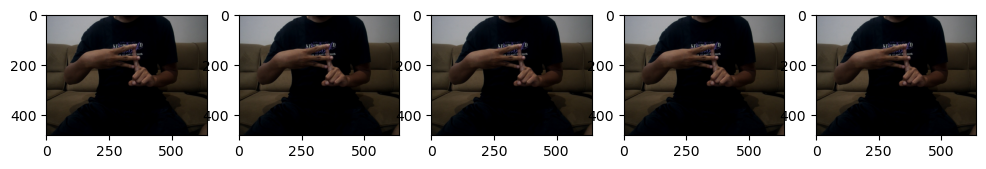

Menampilkan gambar untuk kelas D


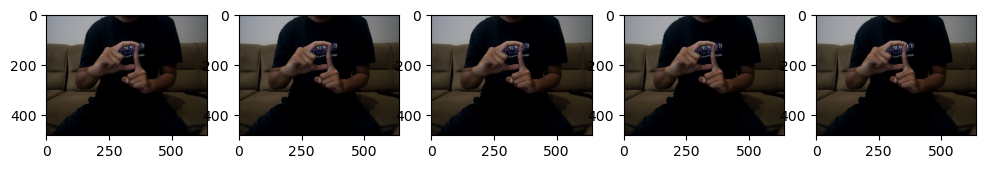

Menampilkan gambar untuk kelas F


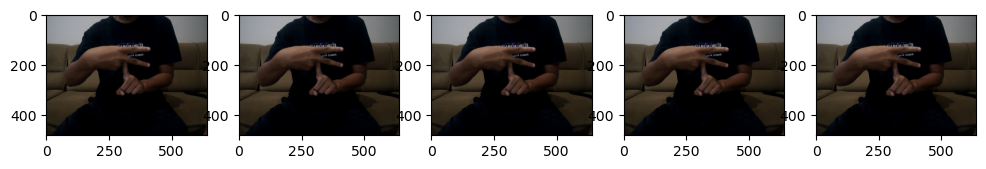

Menampilkan gambar untuk kelas G


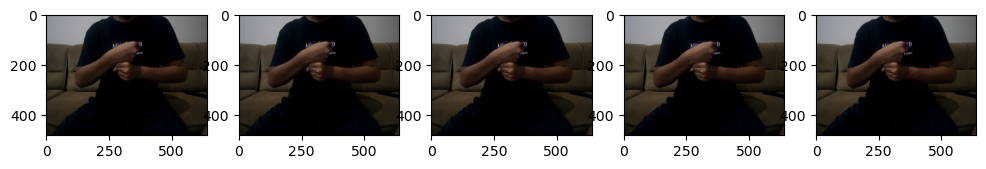

Menampilkan gambar untuk kelas H


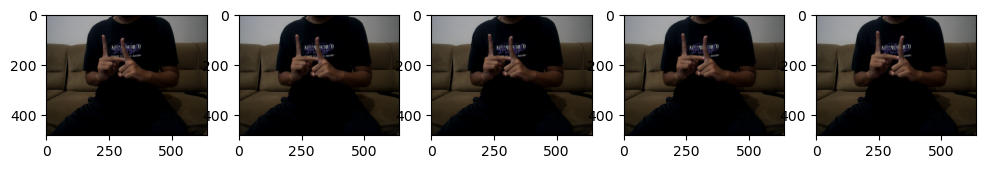

Menampilkan gambar untuk kelas K


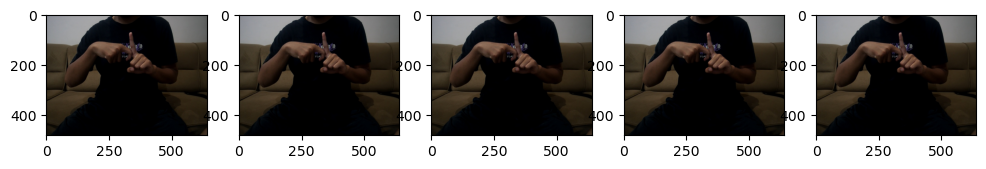

Menampilkan gambar untuk kelas M


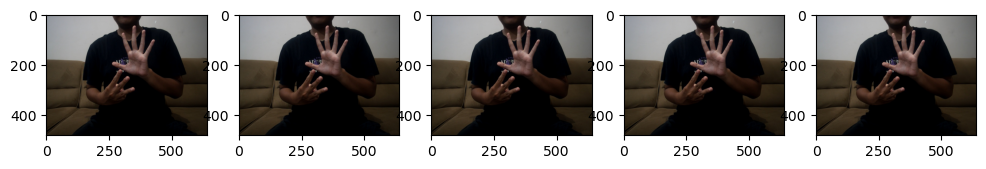

Menampilkan gambar untuk kelas N


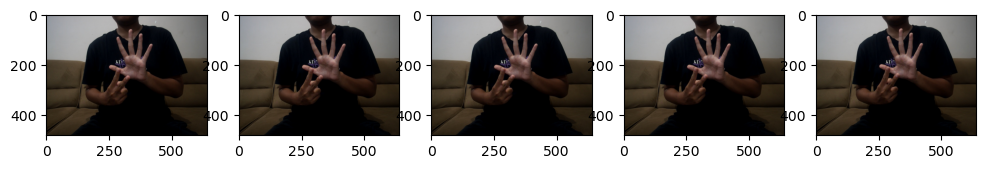

Menampilkan gambar untuk kelas P


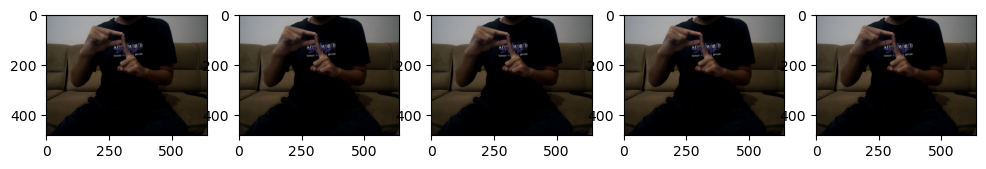

Menampilkan gambar untuk kelas Q


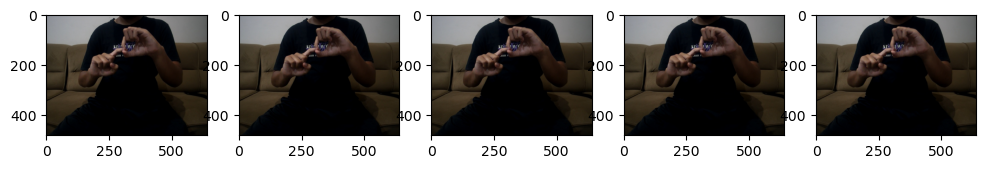

Menampilkan gambar untuk kelas S


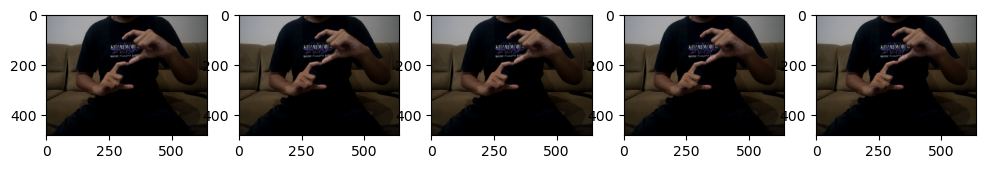

Menampilkan gambar untuk kelas T


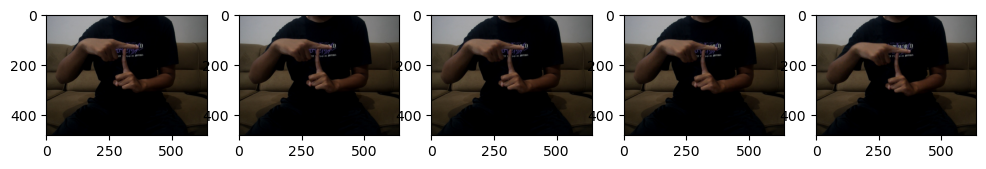

Menampilkan gambar untuk kelas W


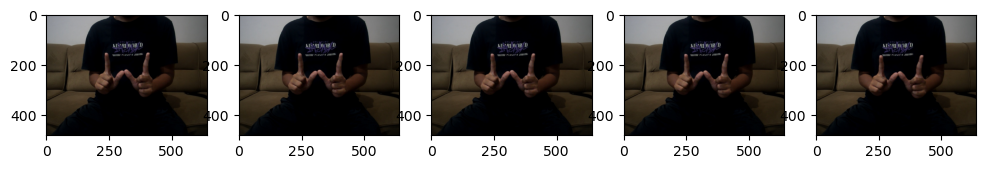

Menampilkan gambar untuk kelas X


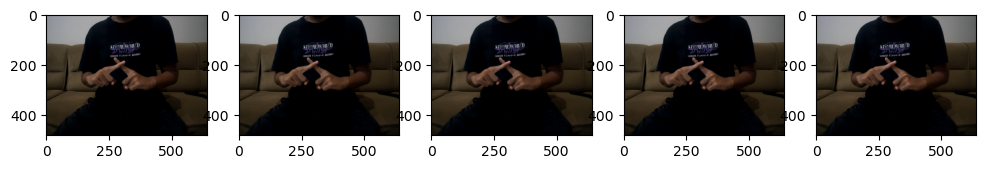

Menampilkan gambar untuk kelas Y


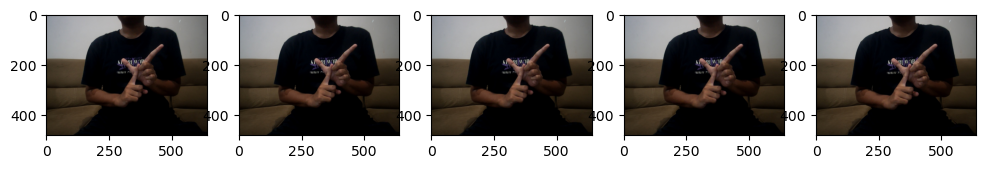

In [45]:
label = {
    0: 'A', 
    1: 'B', 
    2: 'D', 
    3: 'F', 
    4: 'G', 
    5: 'H', 
    6: 'K', 
    7: 'M', 
    8: 'N', 
    9: 'P',
    10: 'Q', 
    11: 'S', 
    12: 'T', 
    13: 'W', 
    14: 'X', 
    15: 'Y'
}
print('Gambar untuk data dua tangan')
number_of_classes = len(label)
for j in range(number_of_classes):
    print('Menampilkan gambar untuk kelas', label[j])

    # Create a subplot for each image, limit to 5 images
    fig, axs = plt.subplots(1, 5, figsize=(12, 3))

    for i in range(5):
        # Read the saved image
        img_path = os.path.join(DATA_DIR2, str(j), '{}.jpg'.format(i))
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

        # Display the image on the corresponding subplot
        axs[i].imshow(img_rgb)
        axs[i].axis('on')

    plt.show()

# Buat Landmark Tangan

Landmark untuk satu tangan

Gambar untuk data satu tangan
Menampilkan gambar untuk kelas C


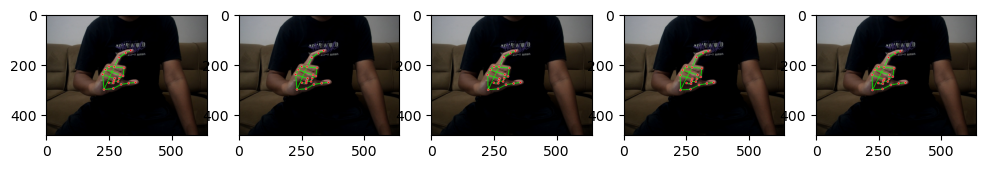

Menampilkan gambar untuk kelas E


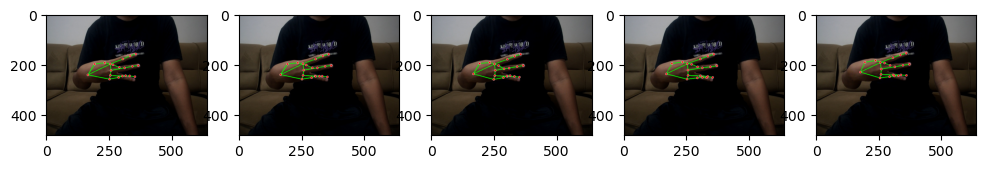

Menampilkan gambar untuk kelas I


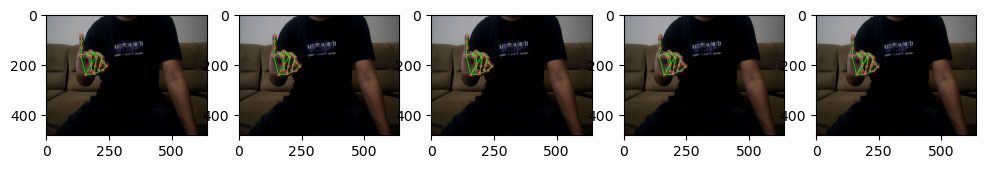

Menampilkan gambar untuk kelas J


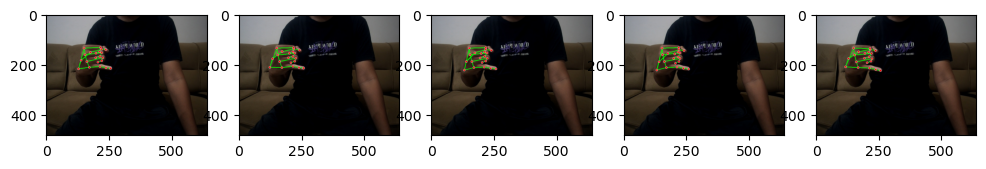

Menampilkan gambar untuk kelas L


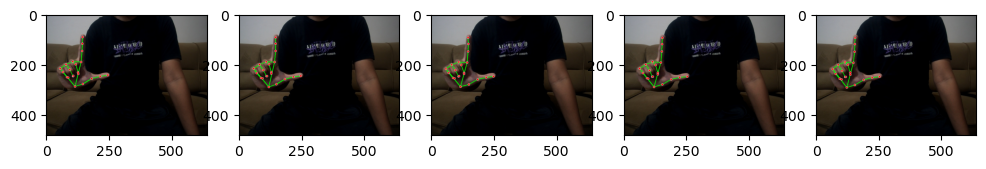

Menampilkan gambar untuk kelas O


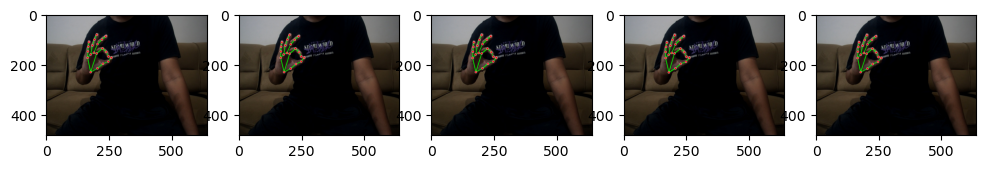

Menampilkan gambar untuk kelas R


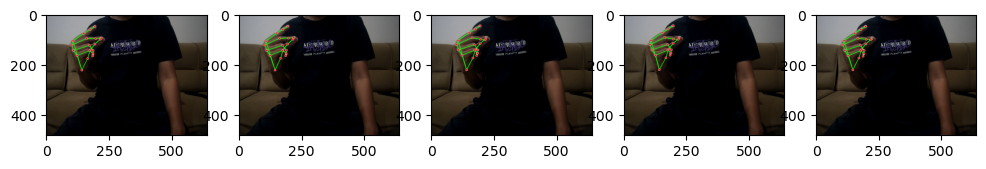

Menampilkan gambar untuk kelas U


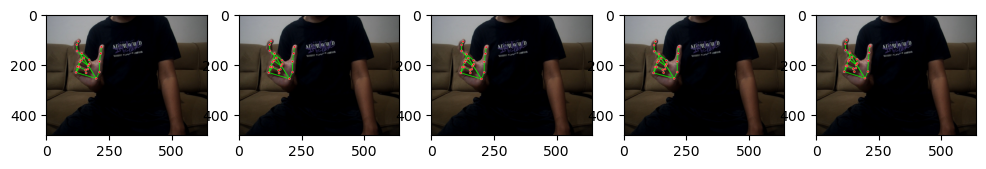

Menampilkan gambar untuk kelas V


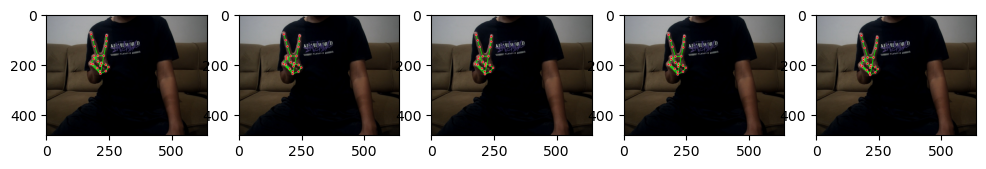

Menampilkan gambar untuk kelas Z


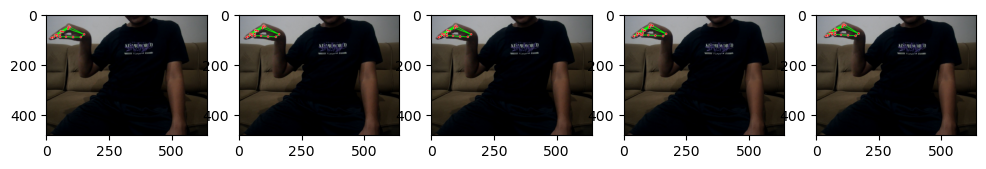

In [46]:
label = {
    0: 'C',
    1: 'E',
    2: 'I',
    3: 'J',
    4: 'L',
    5: 'O',
    6: 'R',
    7: 'U',
    8: 'V',
    9: 'Z'
}
print('Gambar untuk data satu tangan')
number_of_classes = len(label)
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.3)


for j in range(number_of_classes):
    print('Menampilkan gambar untuk kelas', label[j])

    fig, axs = plt.subplots(1, 5, figsize=(12, 3))

    for i in range(5):
        img_path = os.path.join(DATA_DIR1, str(j), '{}.jpg'.format(i))
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = mp_hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                img_rgb,
                hand_landmarks,
                mp.solutions.hands.HAND_CONNECTIONS,
                mp.solutions.drawing_utils.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                mp.solutions.drawing_utils.DrawingSpec(color=(0, 255, 0), thickness=2)
            )
            axs[i].imshow(img_rgb)
        else:
            axs[i].imshow(img_rgb)

        axs[i].axis('on')

    plt.show()

Landmark untuk dua tangan

Gambar untuk data dua tangan
Menampilkan gambar untuk kelas A


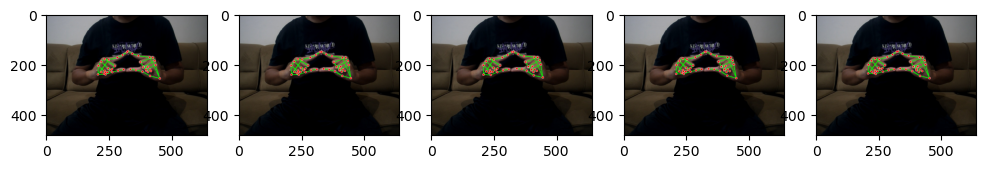

Menampilkan gambar untuk kelas B


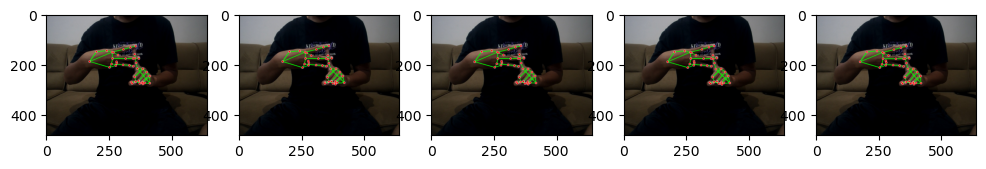

Menampilkan gambar untuk kelas D


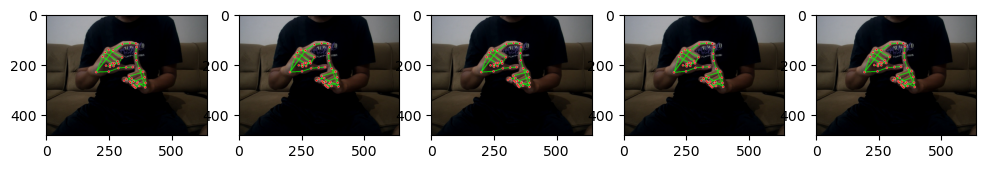

Menampilkan gambar untuk kelas F


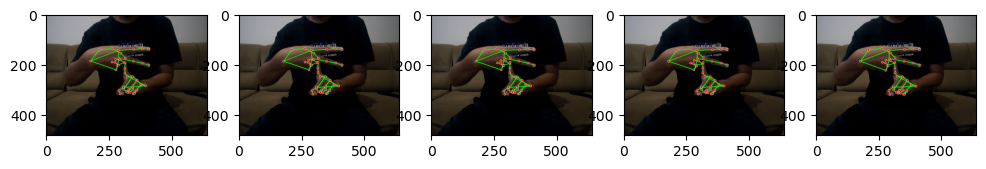

Menampilkan gambar untuk kelas G


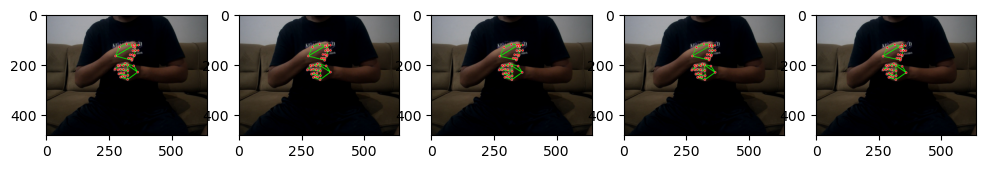

Menampilkan gambar untuk kelas H


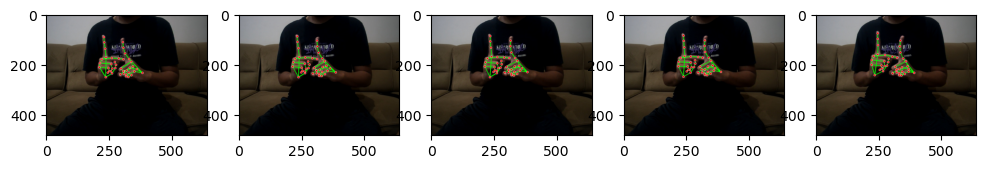

Menampilkan gambar untuk kelas K


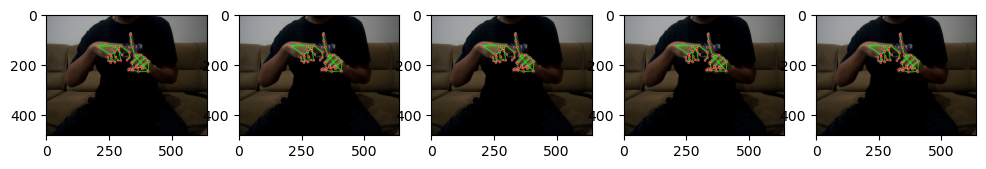

Menampilkan gambar untuk kelas M


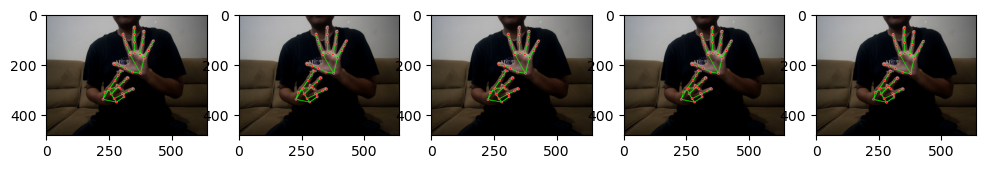

Menampilkan gambar untuk kelas N


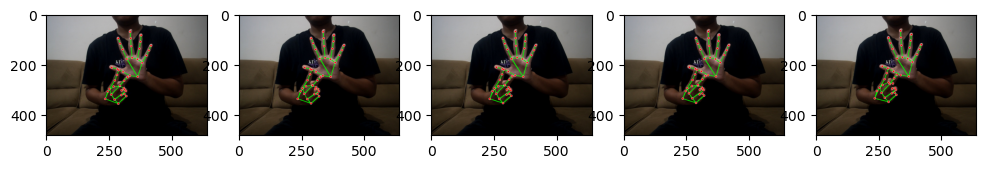

Menampilkan gambar untuk kelas P


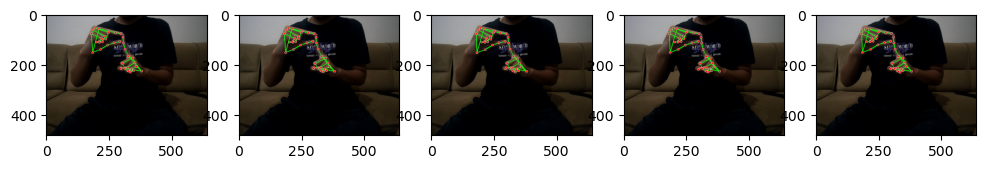

Menampilkan gambar untuk kelas Q


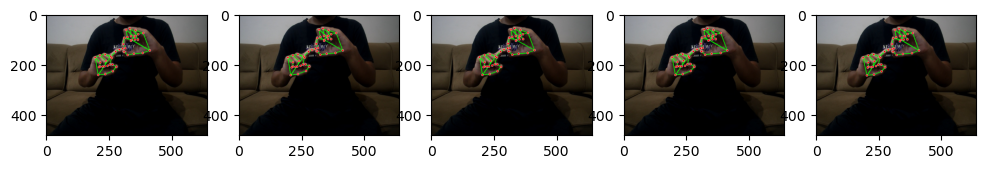

Menampilkan gambar untuk kelas S


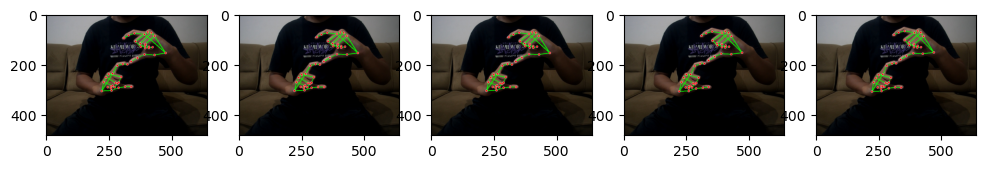

Menampilkan gambar untuk kelas T


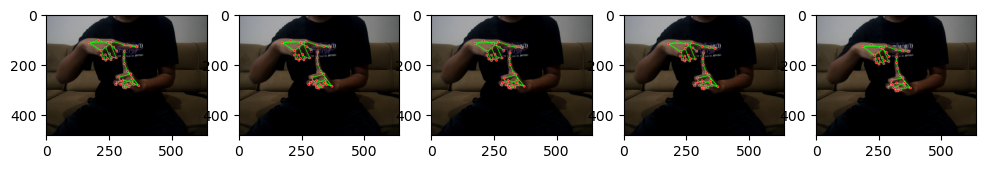

Menampilkan gambar untuk kelas W


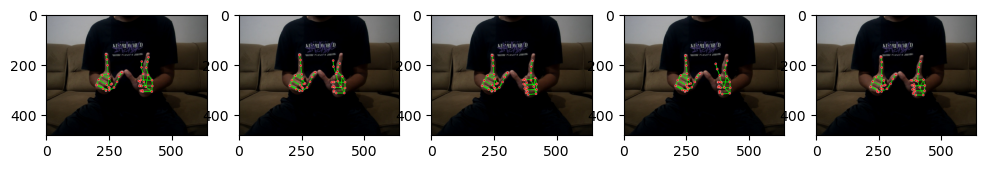

Menampilkan gambar untuk kelas X


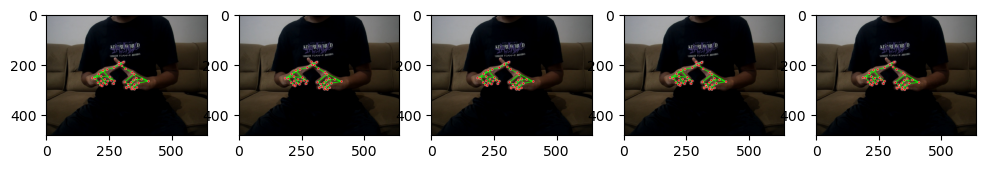

Menampilkan gambar untuk kelas Y


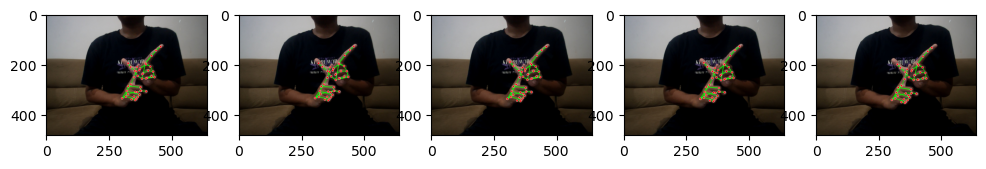

In [47]:
label = {
    0: 'A', 
    1: 'B', 
    2: 'D', 
    3: 'F', 
    4: 'G', 
    5: 'H', 
    6: 'K', 
    7: 'M', 
    8: 'N', 
    9: 'P',
    10: 'Q', 
    11: 'S', 
    12: 'T', 
    13: 'W', 
    14: 'X', 
    15: 'Y'
}
print('Gambar untuk data dua tangan')
number_of_classes = len(label)
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)


for j in range(number_of_classes):
    print('Menampilkan gambar untuk kelas', label[j])

    fig, axs = plt.subplots(1, 5, figsize=(12, 3))

    for i in range(5):
        img_path = os.path.join(DATA_DIR2, str(j), '{}.jpg'.format(i))
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = mp_hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                img_rgb,
                hand_landmarks,
                mp.solutions.hands.HAND_CONNECTIONS,
                mp.solutions.drawing_utils.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                mp.solutions.drawing_utils.DrawingSpec(color=(0, 255, 0), thickness=2)
            )
            axs[i].imshow(img_rgb)
        else:
            axs[i].imshow(img_rgb)

        axs[i].axis('on')

    plt.show()

# Export to CSV

untuk satu tangan

In [48]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.3)

DATA_DIR = './data1tangan'

data = []
labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)

        if not (results.multi_hand_landmarks is None):
            n = len(results.multi_hand_landmarks)
            if n == 1:
                try:
                    for hand_landmarks in results.multi_hand_landmarks:
                        for i in range(len(hand_landmarks.landmark)):
                            x = hand_landmarks.landmark[i].x
                            y = hand_landmarks.landmark[i].y
                            x_.append(x)
                            y_.append(y)
                        for i in range(len(hand_landmarks.landmark)):
                            x = hand_landmarks.landmark[i].x
                            y = hand_landmarks.landmark[i].y
                            data_aux.append(x - min(x_))
                            data_aux.append(y - min(y_))
                    data.append(data_aux)
                    labels.append(dir_)
                except:
                    data_aux = np.zeros([1, 63], dtype=np.float32)[0]

if len(data) > 0 and len(labels) > 0:
    with open('onehand.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['label'] + [f'data_{i}' for i in range(len(data[0]))])  # Writing column headers

        for i in range(len(data)):
            label = labels[i]
            data_row = np.asarray(data[i], dtype=np.float32)
            writer.writerow([label] + data_row.tolist())

    print("CSV file untuk data satu tangan berhasil dibuat")  # CSV successfully created
else:
    print("Tidak ada data yang dikumpulkan, tidak dapat membuat CSV")  # No data collected, unable to create CSV

CSV file untuk data satu tangan berhasil dibuat


In [49]:
# Membaca file CSV
df = pd.read_csv('onehand.csv')

# Menampilkan data
df

label    data_0    data_1    data_2    data_3    data_4    data_5  \
0         0  0.007525  0.322317  0.064790  0.314409  0.112896  0.279829   
1         0  0.008367  0.320662  0.064965  0.313324  0.113587  0.278466   
2         0  0.005035  0.342271  0.063314  0.338701  0.113221  0.304269   
3         0  0.000000  0.230583  0.046595  0.219740  0.083387  0.188270   
4         0  0.000512  0.248690  0.051173  0.228992  0.091174  0.192486   
...     ...       ...       ...       ...       ...       ...       ...   
1995      9  0.173881  0.080503  0.153250  0.094621  0.114257  0.085496   
1996      9  0.173881  0.080503  0.153250  0.094621  0.114257  0.085496   
1997      9  0.176896  0.081339  0.157737  0.091490  0.117735  0.082806   
1998      9  0.176896  0.081339  0.157737  0.091490  0.117735  0.082806   
1999      9  0.180312  0.079807  0.162323  0.092831  0.120208  0.085394   

        data_6    data_7    data_8  ...   data_32   data_33   data_34  \
0     0.160047  0.270023  0.202133  ...  0.067798  0.250806  0.000000   
1     0.161311  0.268093  0.203644  ...  0.067483  0.250146  0.000000   
2     0.161790  0.288386  0.207781  ...  0.067558  0.273008  0.000000   
3     0.116887  0.179833  0.148177  ...  0.053424  0.155969  0.003004   
4     0.128955  0.179779  0.160668  ...  0.049480  0.164222  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
1995  0.077336  0.076078  0.048810  ...  0.002932  0.069701  0.094512   
1996  0.077336  0.076078  0.048810  ...  0.002932  0.069701  0.094512   
1997  0.078914  0.076127  0.049059  ...  0.005249  0.070619  0.091775   
1998  0.078914  0.076127  0.049059  ...  0.005249  0.070619  0.091775   
1999  0.080311  0.079681  0.048754  ...  0.008622  0.080822  0.088945   

       data_35   data_36   data_37   data_38   data_39   data_40   data_41  
0     0.197908  0.072796  0.230824  0.065072  0.268731  0.037401  0.264852  
1     0.197101  0.073827  0.228368  0.066404  0.266525  0.038612  0.263640  
2     0.216331  0.077119  0.256781  0.066659  0.295888  0.039487  0.292732  
3     0.123677  0.059192  0.137330  0.062244  0.156169  0.054360  0.155305  
4     0.123348  0.056961  0.141839  0.054426  0.168519  0.041012  0.172822  
...        ...       ...       ...       ...       ...       ...       ...  
1995  0.016048  0.059511  0.029539  0.036043  0.044421  0.017163  0.060329  
1996  0.016048  0.059511  0.029539  0.036043  0.044421  0.017163  0.060329  
1997  0.019189  0.060195  0.031057  0.038746  0.046465  0.020998  0.062864  
1998  0.019189  0.060195  0.031057  0.038746  0.046465  0.020998  0.062864  
1999  0.021319  0.060955  0.039340  0.044330  0.058523  0.030189  0.075196  

[2000 rows x 43 columns]

In [50]:
# cek detail
#df[df['label']==15]

In [51]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    2000 non-null   int64  
 1   data_0   2000 non-null   float64
 2   data_1   2000 non-null   float64
 3   data_2   2000 non-null   float64
 4   data_3   2000 non-null   float64
 5   data_4   2000 non-null   float64
 6   data_5   2000 non-null   float64
 7   data_6   2000 non-null   float64
 8   data_7   2000 non-null   float64
 9   data_8   2000 non-null   float64
 10  data_9   2000 non-null   float64
 11  data_10  2000 non-null   float64
 12  data_11  2000 non-null   float64
 13  data_12  2000 non-null   float64
 14  data_13  2000 non-null   float64
 15  data_14  2000 non-null   float64
 16  data_15  2000 non-null   float64
 17  data_16  2000 non-null   float64
 18  data_17  2000 non-null   float64
 19  data_18  2000 non-null   float64
 20  data_19  2000 non-null   float64
 21  data_20  2000 

In [52]:
# check missing values in variables

df.isnull().sum()

label      0
data_0     0
data_1     0
data_2     0
data_3     0
data_4     0
data_5     0
data_6     0
data_7     0
data_8     0
data_9     0
data_10    0
data_11    0
data_12    0
data_13    0
data_14    0
data_15    0
data_16    0
data_17    0
data_18    0
data_19    0
data_20    0
data_21    0
data_22    0
data_23    0
data_24    0
data_25    0
data_26    0
data_27    0
data_28    0
data_29    0
data_30    0
data_31    0
data_32    0
data_33    0
data_34    0
data_35    0
data_36    0
data_37    0
data_38    0
data_39    0
data_40    0
data_41    0
dtype: int64

untuk dua tangan

In [53]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)

DATA_DIR = './data2tangan'

# Mengurutkan direktori dengan benar
sorted_dirs = sorted(os.listdir(DATA_DIR), key=lambda x: int(x))

data = []
labels = []

for dir_ in sorted_dirs:
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)

        if not (results.multi_hand_landmarks is None):
            n = len(results.multi_hand_landmarks)
            if n == 2:
                try:
                    for hand_landmarks in results.multi_hand_landmarks:
                        for i in range(len(hand_landmarks.landmark)):
                            x = hand_landmarks.landmark[i].x
                            y = hand_landmarks.landmark[i].y
                            x_.append(x)
                            y_.append(y)
                        for i in range(len(hand_landmarks.landmark)):
                            x = hand_landmarks.landmark[i].x
                            y = hand_landmarks.landmark[i].y
                            data_aux.append(x - min(x_))
                            data_aux.append(y - min(y_))
                    data.append(data_aux)
                    labels.append(dir_)
                except:
                    data_aux = np.zeros([1, 189], dtype=np.float32)[0]

if len(data) > 0 and len(labels) > 0:
    with open('twohand.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['label'] + [f'data_{i}' for i in range(len(data[0]))])  # Menulis header kolom

        for i in range(len(data)):
            label = labels[i]
            data_row = np.asarray(data[i], dtype=np.float32)
            writer.writerow([label] + data_row.tolist())

    print("CSV file untuk data dua tangan berhasil dibuat")  # CSV berhasil dibuat
else:
    print("Tidak ada data yang dikumpulkan, tidak dapat membuat CSV")  # Tidak ada data yang dikumpulkan, tidak dapat membuat CSV


CSV file untuk data dua tangan berhasil dibuat


In [54]:
# Membaca file CSV
df = pd.read_csv('twohand.csv')

# Menampilkan data
df

label    data_0    data_1    data_2    data_3    data_4    data_5  \
0         0  0.000000  0.184210  0.045923  0.185274  0.088737  0.166001   
1         0  0.000573  0.186244  0.045555  0.186609  0.088119  0.166381   
2         0  0.186059  0.225187  0.132312  0.206883  0.086163  0.167999   
3         0  0.105647  0.113054  0.073335  0.102851  0.046163  0.082598   
4         0  0.105383  0.112849  0.073518  0.103148  0.046082  0.082955   
...     ...       ...       ...       ...       ...       ...       ...   
3108     15  0.000000  0.262075  0.035161  0.227319  0.084840  0.206031   
3109     15  0.000000  0.256647  0.035125  0.222709  0.084194  0.201296   
3110     15  0.000000  0.273528  0.032148  0.237486  0.082320  0.217202   
3111     15  0.000000  0.269412  0.031404  0.232340  0.082051  0.212903   
3112     15  0.000000  0.241173  0.028647  0.209563  0.077566  0.190401   

        data_6    data_7    data_8  ...   data_74   data_75   data_76  \
0     0.124164  0.152919  0.159428  ...  0.322619  0.152852  0.357305   
1     0.122752  0.152062  0.158198  ...  0.321104  0.143815  0.357734   
2     0.047712  0.153975  0.012763  ...  0.045879  0.156995  0.003461   
3     0.024340  0.076773  0.004335  ...  0.037158  0.078693  0.016301   
4     0.024642  0.075990  0.004910  ...  0.037505  0.078333  0.016883   
...        ...       ...       ...  ...       ...       ...       ...   
3108  0.125766  0.199435  0.157669  ...  0.130862  0.217258  0.179372   
3109  0.124693  0.194260  0.156054  ...  0.136242  0.218880  0.180768   
3110  0.125400  0.209958  0.158722  ...  0.153978  0.217481  0.200678   
3111  0.124771  0.208435  0.156266  ...  0.156011  0.212532  0.205759   
3112  0.117760  0.188721  0.149782  ...  0.145850  0.211600  0.190732   

       data_77   data_78   data_79   data_80   data_81   data_82   data_83  
0     0.115311  0.298646  0.151781  0.310360  0.171199  0.329722  0.163943  
1     0.108513  0.300930  0.144071  0.313472  0.163984  0.334047  0.157221  
2     0.108352  0.046582  0.166036  0.035440  0.180140  0.020551  0.166997  
3     0.051851  0.042592  0.069343  0.037552  0.084745  0.027282  0.084457  
4     0.050967  0.043285  0.068182  0.038208  0.083829  0.027860  0.083573  
...        ...       ...       ...       ...       ...       ...       ...  
3108  0.253637  0.198376  0.227532  0.169955  0.241941  0.148404  0.251089  
3109  0.254247  0.206324  0.229083  0.178618  0.245347  0.155305  0.254020  
3110  0.240560  0.224922  0.222141  0.192098  0.241366  0.170472  0.247158  
3111  0.241190  0.228126  0.221569  0.196274  0.237986  0.174020  0.242997  
3112  0.242699  0.215526  0.223260  0.185219  0.238036  0.163225  0.242762  

[3113 rows x 85 columns]

In [55]:
# cek detail
# df[df['label']==15]

In [56]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 85 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    3113 non-null   int64  
 1   data_0   3113 non-null   float64
 2   data_1   3113 non-null   float64
 3   data_2   3113 non-null   float64
 4   data_3   3113 non-null   float64
 5   data_4   3113 non-null   float64
 6   data_5   3113 non-null   float64
 7   data_6   3113 non-null   float64
 8   data_7   3113 non-null   float64
 9   data_8   3113 non-null   float64
 10  data_9   3113 non-null   float64
 11  data_10  3113 non-null   float64
 12  data_11  3113 non-null   float64
 13  data_12  3113 non-null   float64
 14  data_13  3113 non-null   float64
 15  data_14  3113 non-null   float64
 16  data_15  3113 non-null   float64
 17  data_16  3113 non-null   float64
 18  data_17  3113 non-null   float64
 19  data_18  3113 non-null   float64
 20  data_19  3113 non-null   float64
 21  data_20  3113 

In [57]:
# check missing values in variables

df.isnull().sum()

label      0
data_0     0
data_1     0
data_2     0
data_3     0
          ..
data_79    0
data_80    0
data_81    0
data_82    0
data_83    0
Length: 85, dtype: int64

# Split Data

In [2]:
# Load data from onehand.csv
with open('./onehand.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader)
    data = list(reader)
    df = pd.DataFrame(data, columns=headers)
    x = df.drop('label', axis=1) # features akan menjadi semua nilai koord
    y = df['label'] # target = label kelas

# Load data from twohand.csv
with open('./twohand.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader)
    data = list(reader)
    df2 = pd.DataFrame(data, columns=headers)
    x2 = df2.drop('label', axis=1) # features akan menjadi semua nilai koord
    y2 = df2['label'] # target = label kelas

In [26]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, shuffle=True, stratify=y2)

In [13]:
# check hasil split X_train and X_test

x_train.shape, x_test.shape

((1600, 42), (400, 42))

In [14]:
x_train2.shape, x_test2.shape

((2490, 84), (623, 84))

# Train Klasifikasi Random Forest

In [27]:
# Train models
model1 = RandomForestClassifier()
model2 = RandomForestClassifier()

model1.fit(x_train, y_train)
model2.fit(x_train2, y_train2)

# Make predictions on test data
y_predict = model1.predict(x_test)
y_predict2 = model2.predict(x_test2)

# Calculate accuracy scores
score1 = accuracy_score(y_test, y_predict)
score2 = accuracy_score(y_test2, y_predict2)

# Print accuracy scores
print('hasil akurasi model1: {}%'.format(score1 * 100))
print('hasil akurasi model2: {}%'.format(score2 * 100))

hasil akurasi model1: 100.0%
hasil akurasi model2: 99.83948635634029%


In [1]:
# from sklearn.tree import export_graphviz
# import graphviz
# from IPython.display import display, Image

# # Menghasilkan representasi grafik dari model
# dot_data = export_graphviz(model1.estimators_[0], out_file=None,
#                            feature_names=x_train.columns,
#                            class_names=model1.classes_,
#                            filled=True, rounded=True,
#                            special_characters=True)

# # Membuat objek grafik dari representasi dot_data
# graph = graphviz.Source(dot_data)

# # Menyimpan grafik sebagai file PDF
# graph.render("random_forest_graph", format='png')

# # Menampilkan file PNG di output
# display(Image(filename="random_forest_graph.png"))

# Evaluasi Model

In [28]:
# Menyimpan label dan hasil prediksi ke dalam file CSV
output_data = zip(y_test, y_predict)

with open('label_prediksi.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Test', 'Prediksi'])
    writer.writerows(output_data)

print("Data label dan prediksi 1 tangan berhasil disimpan dalam file label_prediksi.csv")

# Menyimpan label dan hasil prediksi ke dalam file CSV
output_data = zip(y_test2, y_predict2)

with open('label_prediksi2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Test', 'Prediksi'])
    writer.writerows(output_data)

print("Data label dan prediksi 2 tangan berhasil disimpan dalam file label_prediksi.csv")


Data label dan prediksi 1 tangan berhasil disimpan dalam file label_prediksi.csv
Data label dan prediksi 2 tangan berhasil disimpan dalam file label_prediksi.csv


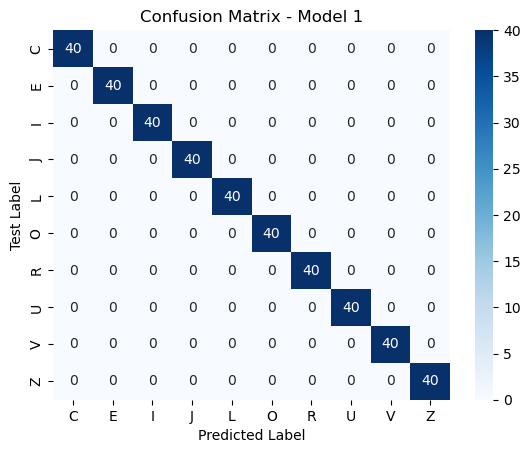

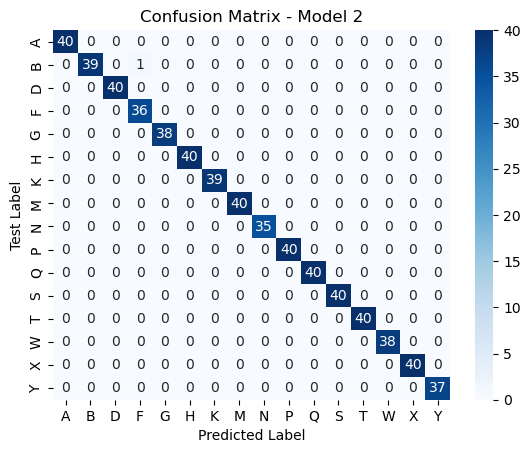

In [29]:
label1 = {'C': 0,'E': 1,'I': 2,'J': 3,'L': 4,'O': 5,'R': 6,'U': 7,'V': 8,'Z': 9
}

label2 = {'A': 0,'B': 1,'D': 2,'F': 3,'G': 4,'H': 5,'K': 6,'M': 7,'N': 8,'P': 9,'Q': 10,
          'S': 11,'T': 12,'W': 13,'X': 14,'Y': 15
}
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']

# Plot confusion matrix for model1
cm1 = confusion_matrix(y_test, y_predict)
plt.figure()
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label1, yticklabels=label1)
plt.title('Confusion Matrix - Model 1')
plt.xlabel('Predicted Label')
plt.ylabel('Test Label')
plt.show()

# Plot confusion matrix for model2
cm2 = confusion_matrix(y_test2, y_predict2, labels=labels)
plt.figure()
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label2, yticklabels=label2)
plt.title('Confusion Matrix - Model 2')
plt.xlabel('Predicted Label')
plt.ylabel('Test Label')
plt.show()

In [30]:
multilabel = multilabel_confusion_matrix(y_test, y_predict)
print(multilabel)

[[[360   0]
  [  0  40]]

 [[360   0]
  [  0  40]]

 [[360   0]
  [  0  40]]

 [[360   0]
  [  0  40]]

 [[360   0]
  [  0  40]]

 [[360   0]
  [  0  40]]

 [[360   0]
  [  0  40]]

 [[360   0]
  [  0  40]]

 [[360   0]
  [  0  40]]

 [[360   0]
  [  0  40]]]


In [31]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
multilabel2 = multilabel_confusion_matrix(y_test2, y_predict2, labels=labels)
print(multilabel2)

[[[583   0]
  [  0  40]]

 [[583   0]
  [  1  39]]

 [[583   0]
  [  0  40]]

 [[586   1]
  [  0  36]]

 [[585   0]
  [  0  38]]

 [[583   0]
  [  0  40]]

 [[584   0]
  [  0  39]]

 [[583   0]
  [  0  40]]

 [[588   0]
  [  0  35]]

 [[583   0]
  [  0  40]]

 [[583   0]
  [  0  40]]

 [[583   0]
  [  0  40]]

 [[583   0]
  [  0  40]]

 [[585   0]
  [  0  38]]

 [[583   0]
  [  0  40]]

 [[586   0]
  [  0  37]]]


# Classification Report

In [9]:
print('\033[1m' + "Report model 1" + '\033[0m')
print(classification_report(y_test, y_predict))
print("labels: 'C': 0,'E': 1,'I': 2,'J': 3,'L': 4,'O': 5,'R': 6,'U': 7,'V': 8,'Z': 9")
print()
print('\033[1m' + "Report model 2" + '\033[0m')
print(classification_report(y_test2, y_predict2, labels=labels))
print("labels: 'A': 0,'B': 1,'D': 2,'F': 3,'G': 4,'H': 5,'K': 6,'M': 7,'N': 8,'P': 9,'Q': 10,'S': 11,'T': 12,'W': 13,'X': 14,'Y': 15")

Report model 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        40
           9       1.00      1.00      1.00        40

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

labels: 'C': 0,'E': 1,'I': 2,'J': 3,'L': 4,'O': 5,'R': 6,'U': 7,'V': 8,'Z': 9

Report model 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00

# Save Model

In [70]:
# Save models pickle

with open('./model1.p', 'wb') as f:
    pickle.dump({'model1': model1}, f)

with open('./model2.p', 'wb') as f:
    pickle.dump({'model2': model2}, f)

# Real Time Test

In [72]:
model_dict1 = pickle.load(open('./model1.p', 'rb'))
model_dict2 = pickle.load(open('./model2.p', 'rb'))
model1 = model_dict1['model1']
model2 = model_dict2['model2']

cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)

labels_dict1 = {0: 'C', 1: 'E', 2: 'I', 3: 'J', 4: 'L', 5: 'O', 6: 'R', 7: 'U', 8: 'V', 9: 'Z'}
labels_dict2 = {0: 'A', 1: 'B', 2: 'D', 3: 'F', 4: 'G', 5: 'H', 6: 'K', 7: 'M', 8: 'N', 9: 'P',
                10: 'Q', 11: 'S', 12: 'T', 13: 'W', 14: 'X', 15: 'Y'}

while True:
    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()
    cv2.putText(frame, 'Arahkan Tangan ke Kamera', (40, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    H, W, _ = frame.shape

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)
    if results.multi_hand_landmarks:
        n = len(results.multi_hand_landmarks)
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks:
            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

                x_.append(x)
                y_.append(y)

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x - min(x_))
                data_aux.append(y - min(y_))
        if n == 1:
            x1 = int(min(x_) * W) - 10
            y1 = int(min(y_) * H) - 10

            x2 = int(max(x_) * W) - 10
            y2 = int(max(y_) * H) - 10

            prediction1 = model1.predict([np.asarray(data_aux)])

            predicted_character1 = labels_dict1[int(prediction1[0])]

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
            cv2.putText(frame, predicted_character1, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3, cv2.LINE_AA)
        else:
            x1 = int(min(x_) * W) - 10
            y1 = int(min(y_) * H) - 10

            x2 = int(max(x_) * W) - 10
            y2 = int(max(y_) * H) - 10

            prediction2 = model2.predict([np.asarray(data_aux)])

            predicted_character2 = labels_dict2[int(prediction2[0])]

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
            cv2.putText(frame, predicted_character2, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3, cv2.LINE_AA)

    cv2.imshow('frame', frame)

    # Wait for key press
    key = cv2.waitKey(1)

    # Check if 'X' key is pressed
    if key == ord('x') or key == ord('X'):
        break

cap.release()
cv2.destroyAllWindows()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

In [4]:
model_dict1 = pickle.load(open('./model1.p', 'rb'))
model_dict2 = pickle.load(open('./model2.p', 'rb'))
model1 = model_dict1['model1']
model2 = model_dict2['model2']

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)

labels_dict1 = {0: 'C', 1: 'E', 2: 'I', 3: 'J', 4: 'L', 5: 'O', 6: 'R', 7: 'U', 8: 'V', 9: 'Z'}
labels_dict2 = {0: 'A', 1: 'B', 2: 'D', 3: 'F', 4: 'G', 5: 'H', 6: 'K', 7: 'M', 8: 'N', 9: 'P',
                10: 'Q', 11: 'S', 12: 'T', 13: 'W', 14: 'X', 15: 'Y'}

def process_image(image_path):
    frame = cv2.imread(image_path)
    H, W, _ = frame.shape

    data_aux = []
    x_ = []
    y_ = []

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)
    if results.multi_hand_landmarks:
        n = len(results.multi_hand_landmarks)
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks:
            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

                x_.append(x)
                y_.append(y)

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x - min(x_))
                data_aux.append(y - min(y_))
        if n == 1:
            x1 = int(min(x_) * W) - 10
            y1 = int(min(y_) * H) - 10

            x2 = int(max(x_) * W) - 10
            y2 = int(max(y_) * H) - 10

            prediction1 = model1.predict([np.asarray(data_aux)])
            predicted_character1 = labels_dict1[int(prediction1[0])]

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
            cv2.putText(frame, predicted_character1, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3, cv2.LINE_AA)
            
        else:
            x1 = int(min(x_) * W) - 10
            y1 = int(min(y_) * H) - 10

            x2 = int(max(x_) * W) - 10
            y2 = int(max(y_) * H) - 10

            prediction2 = model2.predict([np.asarray(data_aux)])
            predicted_character2 = labels_dict2[int(prediction2[0])]
            
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
            cv2.putText(frame, predicted_character2, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3, cv2.LINE_AA)
            
    cv2.imshow('result', frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def handle_upload(change):
    uploaded_image = list(upload_button.value.values())[0]
    image_path = 'uploaded_image.jpg'
    with open(image_path, 'wb') as file:
        file.write(uploaded_image['content'])
    process_image(image_path)

upload_button = widgets.FileUpload()
upload_button.observe(handle_upload, names='value')

display(upload_button)

FileUpload(value={}, description='Upload')